In [1]:
#MNIST with CNN
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#we will do some tuple unpacking here because this data is already arranged for us in test and training. We don't need to train
#it by ourselves.

11493376/11490434 [==============================] - 23s 2us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]
single_image   #raw values of the single image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
single_image.shape

(28, 28)

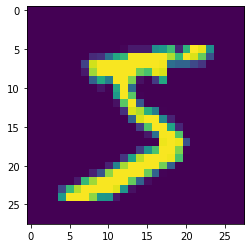

In [7]:
#if we have a 2 dimesional image matplotlib has imshow which can display the 2 dimesional array objects
plt.imshow(single_image)

In [10]:
#mnist data is grayscale, it only goes from 0 to maximum value 255
y_train
#right now labels are the numbers that they represent. If we pass on the labels like this the newtwork would assume it as a
#continuous value and predict somethingas 5.5 or 4.2 etc. In reality, these are categories, so we are doing a classification 
#problem. So, we need to one hot encode this.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
#tensorflow has utilities for one hot encoding
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape
#we need to transform it to one hot encoding for it to be (60000,10)

(60000,)

In [14]:
y_example=to_categorical(y_train)

In [15]:
help(to_categorical)

Help on function to_categorical in module tensorflow.python.keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    Arguments:
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input. Default: `'float32'`.
    
    Returns:
        A binary matrix representation of the input. The classes axis is placed
        last.



In [17]:
y_example.shape

(60000, 10)

In [16]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
y_example[0]   #belongs to class number 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test=to_categorical(y_test)
y_cat_train=to_categorical(y_train)

In [20]:
#now we want to normalize our training data in both the test and the train.
#our training data is image data and the values go from 0 to 255. So we need to scale them between 0 and 1 so that we don't run
#into the gradient problem

In [21]:
#we can use sklearn.preprocessing import MinMaxScaler. We only fit on training data and transform on test data.
#but since we are dealing with image data, we are sure of the fact that all the future images will be in the range of 0 to 255,
#whereas in the case of numeric data we are not sure of the range hence we transform it using any scaler from keras.
#so an easy way of doing this is as follows
x_train=x_train/255
x_test=x_test/255

In [22]:
scaled_image=x_train[0]

In [23]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

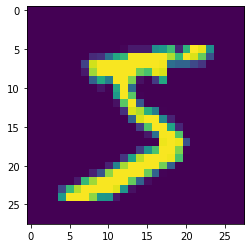

In [24]:
plt.imshow(scaled_image)

In [25]:
x_train.shape
#we need to add 1 more dimension to it to let the network know that we are dealing with single RGB channel.
#essentially the images are in black and white so we have an single image color channel from 0 t0 1.

(60000, 28, 28)

In [26]:
x_train=x_train.reshape(60000,28,28,1)
#batch_size,width,height,color_channels

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_test=x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten

In [31]:
model=Sequential()

#the first layer that CNN encounters is convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#if we have a complex dataset than we have to add more filters, kernel_size typically in the size of 2*2 or 4*4 based on data, 
#strides cn be adjusted based on image, paddinf can be valid and same check stackoverflow

#after conv layer we will have pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#right now we just keep it simple 1 conv layer and 1 pooling layer

#after our series of conv and pooling layers we will need to flatten out the images. When we are flattening out the images
#that essentially means take a 28*28 image and then flatten it out to be a single array of 28*28=784 points
model.add(Flatten())

#once we have flatten out the image we can start adding dense layers. It is usually a good idea to add in 1 final dense layer
model.add(Dense(128,activation='relu'))    #128 neurons. something power of 2

#output layer -->10 neurons-->1 neuron per class
model.add(Dense(10,activation='softmax'))    #softmax for multiclass problem

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#to study more about metrics go to--> keras.io/metrics

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [34]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.1407 - accuracy: 0.9580 - val_loss: 0.0526 - val_accuracy: 0.9826
Epoch 2/15
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0498 - accuracy: 0.9849 - val_loss: 0.0454 - val_accuracy: 0.9843
Epoch 3/15
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0385 - val_accuracy: 0.9878
Epoch 4/15
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0403 - val_accuracy: 0.9867
Epoch 5/15
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.0516 - val_accuracy: 0.9841


In [35]:
metrics=pd.DataFrame(model.history.history)

In [36]:
metrics
#in model.compile we take keep track of accuracy here not just only loss hence accuracy also mentioned in model.history

,loss,accuracy,val_loss,val_accuracy
0,0.140740,0.958000,0.052582,0.9826
1,0.049794,0.984883,0.045424,0.9843
2,0.032308,0.990017,0.038489,0.9878
3,0.022083,0.992800,0.040292,0.9867
4,0.015855,0.994533,0.051643,0.9841


<AxesSubplot:>

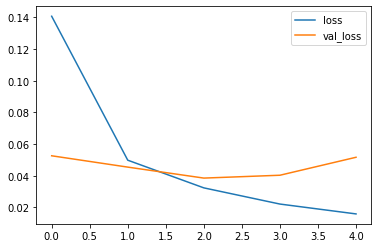

In [37]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

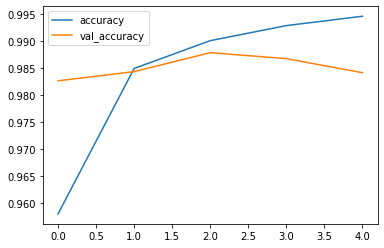

In [39]:
metrics[['accuracy','val_accuracy']].plot()

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
#if we want to get the metrics of these loss or accuracy on any set of data we can say model.evaluates
model.evaluate(x_test,y_cat_test,verbose=0)
#it will report loss and accuracy on the test set

[0.0516428105644125, 0.9841]

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
predictions=model.predict_classes(x_test)

In [44]:
y_cat_test.shape

(10000, 10)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.93      0.96       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [46]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    1,    1,    0,    0,    3,    0,    1,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1021,    0,    2,    0,    0,    5,    1,    0],
       [   0,    0,    9,  997,    1,    1,    0,    0,    2,    0],
       [   0,    0,    0,    0,  976,    0,    0,    0,    0,    6],
       [   2,    2,    0,   30,    0,  833,    7,    1,   11,    6],
       [   1,    5,    1,    0,    2,    1,  946,    0,    2,    0],
       [   0,    1,    6,    0,    0,    0,    0, 1015,    2,    4],
       [   3,    1,    6,    0,    0,    0,    0,    1,  960,    3],
       [   1,    2,    1,    4,    7,    0,    0,    6,    2,  986]],
      dtype=int64)

In [47]:
import seaborn as sns

<AxesSubplot:>

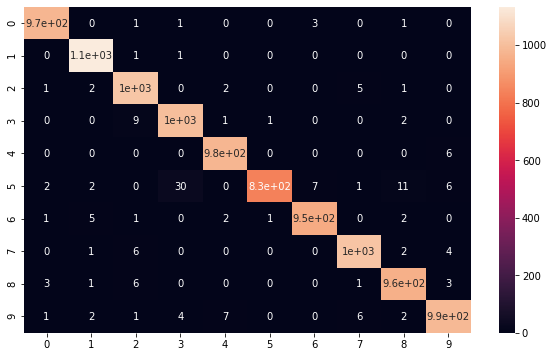

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [50]:
my_number=x_test[0]

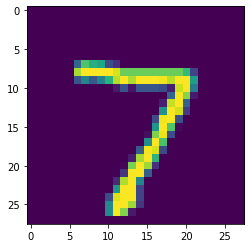

In [51]:
plt.imshow(my_number)

In [53]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)